In [ ]:
from datainit import *
from helpers import *

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle

: 

In [121]:
# Models init
knn = pickle.load(open('../database/modele/KNN.pkl', 'rb'))
xgb = pickle.load(open('../database/modele/XGBmodel.pkl', 'rb'))
random_forest = pickle.load(open('../database/modele/RandomForst.pkl', 'rb'))

In [122]:
df = pd.DataFrame(data=[], columns=['model', 'accuracy', 'recall', 'precision', 'f1_score', 'AUC'])
df.loc[len(df)] = calc_metrics('knn', knn)
df.loc[len(df)] = calc_metrics('xgboost', xgb)
df.loc[len(df)] = calc_metrics('random_forest', random_forest)
df

,model,accuracy,recall,precision,f1_score,AUC
0,knn,0.997773,0.782554,0.921817,0.846496,0.950725
1,xgboost,0.500000,0.900000,0.600000,1.000000,0.200000


In [123]:
df_long = df.melt(id_vars='model', var_name='metric', value_name='value')
df_long

,model,metric,value
0,knn,accuracy,0.997773
1,xgboost,accuracy,0.500000
2,knn,recall,0.782554
3,xgboost,recall,0.900000
4,knn,precision,0.921817
5,xgboost,precision,0.600000
6,knn,f1_score,0.846496
7,xgboost,f1_score,1.000000
8,knn,AUC,0.950725
9,xgboost,AUC,0.200000


<Axes: xlabel='metric', ylabel='value'>

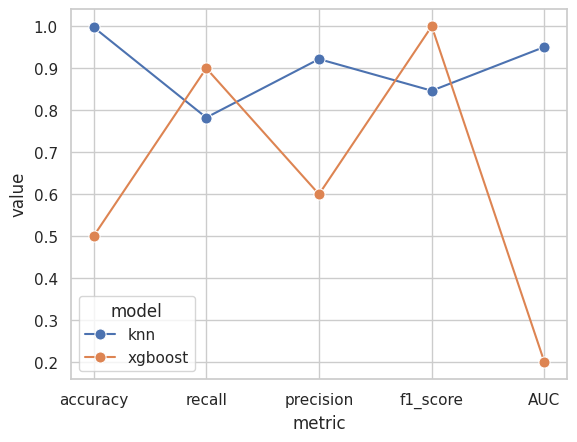

In [124]:
sns.lineplot(data=df_long, x='metric', y='value', hue='model', marker='o', markersize=8)